<a href="https://colab.research.google.com/github/Plusero/TinyML/blob/main/2-4-3-HorsesOrHumans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Download the neccessary data into the Colab Instance

In [23]:
import tensorflow as tf 
import tensorflow_datasets as tfds
dataset_name = 'horses_or_humans' 
ds_train, ds_info = tfds.load(name=dataset_name, split='train', with_info=True)
ds_test = tfds.load(name=dataset_name, split='test')
!unzip /root/tensorflow_datasets/downloads/download.tensorflow.org_horse-or-human4ub3DT1UnF3RClcWXlWvJT7matdQQD-VwPt2u5Q2M6k.zip -d /content/train 
!unzip /root/tensorflow_datasets/downloads/downloa.tensorf.org_validat-horse-or-humanrl__L09VVHkfBTWBCOLgXZgBsZHxiW6hAUAvDn9sMsA.zip -d /content/valid

Archive:  /root/tensorflow_datasets/downloads/download.tensorflow.org_horse-or-human4ub3DT1UnF3RClcWXlWvJT7matdQQD-VwPt2u5Q2M6k.zip
  inflating: /content/train/horses/horse01-0.png  
  inflating: /content/train/horses/horse01-1.png  
  inflating: /content/train/horses/horse01-2.png  
  inflating: /content/train/horses/horse01-3.png  
  inflating: /content/train/horses/horse01-4.png  
  inflating: /content/train/horses/horse01-5.png  
  inflating: /content/train/horses/horse01-6.png  
  inflating: /content/train/horses/horse01-7.png  
  inflating: /content/train/horses/horse01-8.png  
  inflating: /content/train/horses/horse01-9.png  
  inflating: /content/train/horses/horse02-0.png  
  inflating: /content/train/horses/horse02-1.png  
  inflating: /content/train/horses/horse02-2.png  
  inflating: /content/train/horses/horse02-3.png  
  inflating: /content/train/horses/horse02-4.png  
  inflating: /content/train/horses/horse02-5.png  
  inflating: /content/train/horses/horse02-6.png  
 

In [24]:
import os
import zipfile


local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

BadZipFile: ignored

In [26]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/train/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('/content/train/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('content/valid/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('/content/valid/humans')
train_horse_names = os.listdir('/content/train/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('/content/train/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('/content/valid/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('/content/valid/humans')
print(validation_human_names[:10])

['horse30-1.png', 'horse13-4.png', 'horse24-6.png', 'horse05-8.png', 'horse47-4.png', 'horse42-3.png', 'horse25-5.png', 'horse34-4.png', 'horse22-8.png', 'horse20-3.png']
['human07-23.png', 'human17-19.png', 'human11-28.png', 'human01-07.png', 'human02-16.png', 'human04-14.png', 'human02-20.png', 'human13-16.png', 'human16-12.png', 'human01-11.png']
['horse4-202.png', 'horse6-275.png', 'horse2-183.png', 'horse3-498.png', 'horse3-055.png', 'horse5-519.png', 'horse4-403.png', 'horse5-400.png', 'horse4-232.png', 'horse5-303.png']
['valhuman05-22.png', 'valhuman03-23.png', 'valhuman03-22.png', 'valhuman03-08.png', 'valhuman05-24.png', 'valhuman04-24.png', 'valhuman02-13.png', 'valhuman01-04.png', 'valhuman03-17.png', 'valhuman02-11.png']


In [27]:
import tensorflow as tf

## Define your model and optimizer

In [28]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [30]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

## Organize your data into Generators

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented according to whichever lines are uncommented below.
# we can first try without any of the augmentation beyond the rescaling
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/content/valid/',
        target_size=(100, 100),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Train your model
This may take a little while. Remember we are now building and training relatively complex computer vision models!

In [32]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 17s 797ms/step - loss: 1.4021 - acc: 0.5128 - val_loss: 0.6951 - val_acc: 0.5000
Epoch 2/100
8/8 [==============================] - 6s 737ms/step - loss: 0.6793 - acc: 0.5717 - val_loss: 0.6827 - val_acc: 0.5000
Epoch 3/100
8/8 [==============================] - 6s 736ms/step - loss: 0.7293 - acc: 0.6018 - val_loss: 1.0448 - val_acc: 0.5000
Epoch 4/100
8/8 [==============================] - 6s 731ms/step - loss: 0.7466 - acc: 0.5606 - val_loss: 0.6498 - val_acc: 0.8320
Epoch 5/100
8/8 [==============================] - 7s 829ms/step - loss: 0.5983 - acc: 0.7597 - val_loss: 0.6946 - val_acc: 0.5000
Epoch 6/100
8/8 [==============================] - 6s 756ms/step - loss: 0.5071 - acc: 0.7898 - val_loss: 0.4039 - val_acc: 0.8438
Epoch 7/100
8/8 [==============================] - 6s 719ms/step - loss: 0.3806 - acc: 0.8687 - val_loss: 0.5450 - val_acc: 0.7969
Epoch 8/100
8/8 [==============================] - 7s 844ms/step - loss: 0.3202 - 

## Run your Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human. **Was the model correct? Try a couple more images and see if you can confuse it!**

In [34]:
import numpy as np
from google.colab import files
from tensorflow.keras import utils

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = utils.load_img(path, target_size=(100, 100))
  x = utils.img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving 下载 (1).jpg to 下载 (1).jpg
1/1 [==============================] - 0s 21ms/step
[[0.00010835]]
[0.00010835]
下载 (1).jpg is a horse


## Finally lets visualize all of the model layers!

1/1 [==============================] - 0s 123ms/step


<ipython-input-35-2712d6f650d3>:50: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


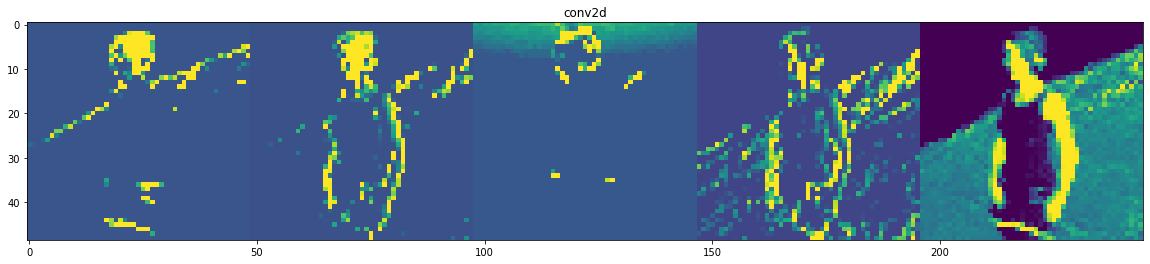

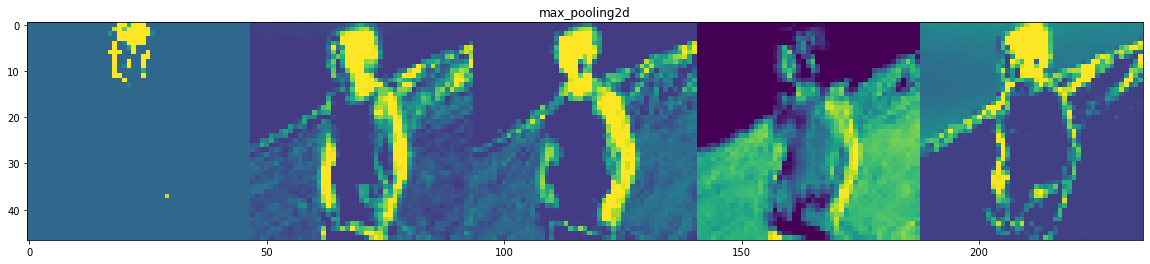

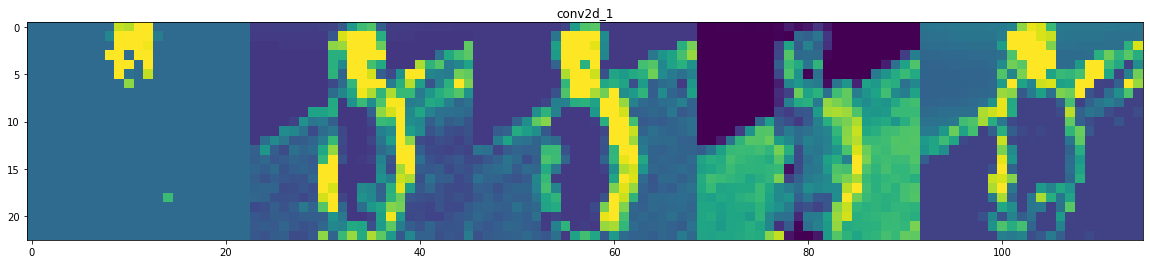

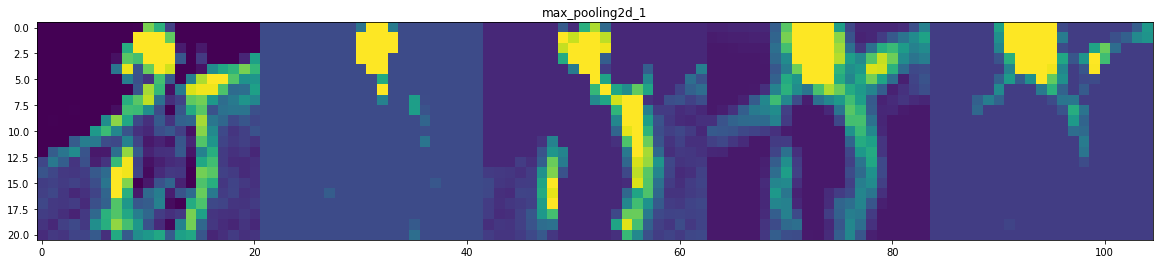

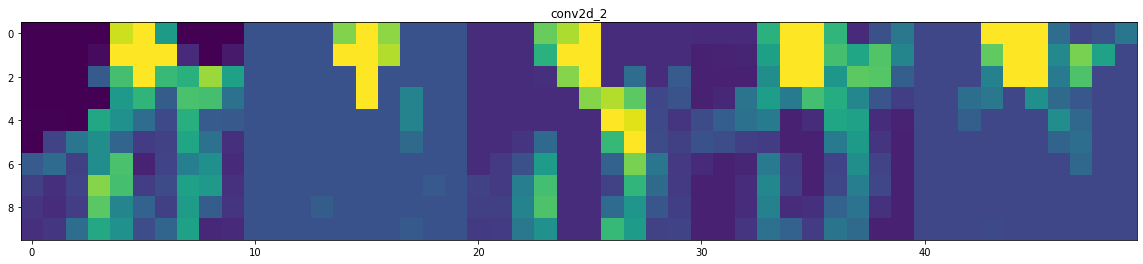

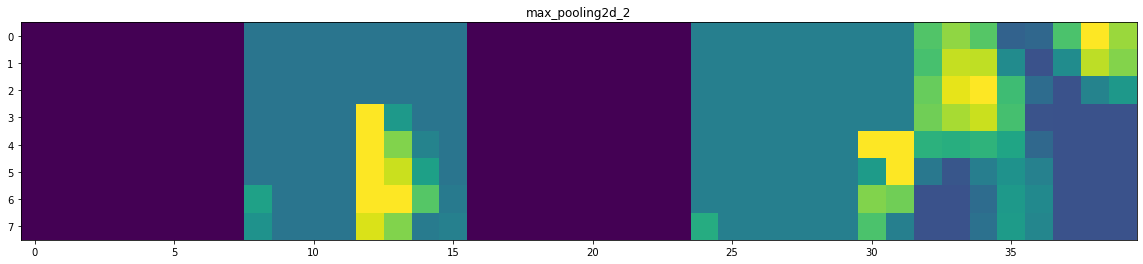

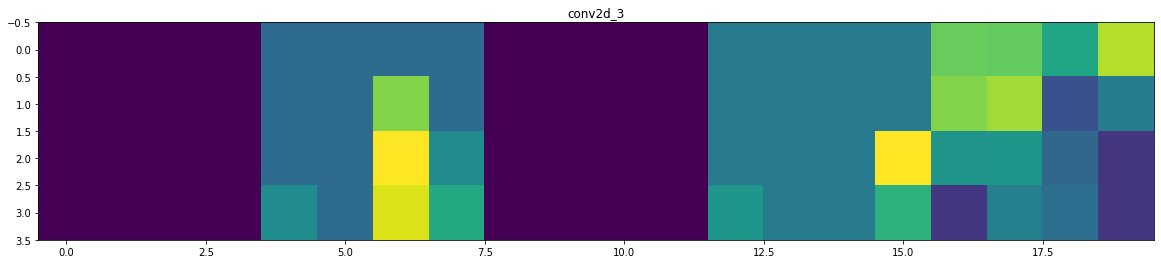

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# uncomment the following line if you want to pick the Xth human file manually
img_path = human_img_files[0]

img = load_img(img_path, target_size=(100, 100))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (100, 100, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 100, 100, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,5) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)